Scrolling: 9scrolls [00:15,  1.68s/scrolls]


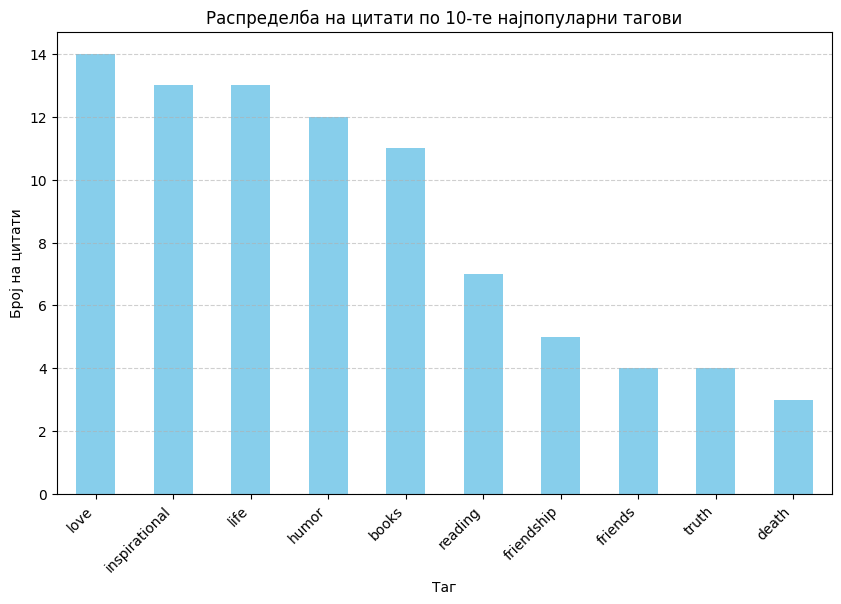

,quote,author,tags
0,“The world as we have created it is a process ...,Albert Einstein,"[change, deep-thoughts, thinking, world]"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"[abilities, choices]"
2,“There are only two ways to live your life. On...,Albert Einstein,"[inspirational, life, live, miracle, miracles]"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"[aliteracy, books, classic, humor]"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"[be-yourself, inspirational]"


In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

# --- Поставување на Selenium WebDriver ---
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # без прозорец
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
driver.get("https://quotes.toscrape.com/scroll")

# --- Scroll до крајот на страницата ---
last_height = driver.execute_script("return document.body.scrollHeight")
pbar = tqdm(desc="Scrolling", unit="scrolls")

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(1.5)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
    pbar.update(1)
pbar.close()

# --- Собирање на сите цитати, автори и тагови ---
quotes_elements = driver.find_elements(By.CLASS_NAME, "quote")

data = []
for q in quotes_elements:
    text = q.find_element(By.CLASS_NAME, "text").text
    author = q.find_element(By.CLASS_NAME, "author").text
    tags = [t.text for t in q.find_elements(By.CLASS_NAME, "tag")]
    data.append({"quote": text, "author": author, "tags": tags})

driver.quit()

# --- Конверзија во DataFrame ---
df = pd.DataFrame(data)
df_exploded = df.explode("tags")

# --- Најпопуларни 10 тагови ---
tag_counts = df_exploded["tags"].value_counts().head(10)

# --- Визуелизација ---
plt.figure(figsize=(10,6))
tag_counts.plot(kind="bar", color="skyblue")
plt.title("Распределба на цитати по 10-те најпопуларни тагови")
plt.xlabel("Таг")
plt.ylabel("Број на цитати")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# --- Прикажи пример од податоците ---
df.head()